# Unlocking the Power of Interaction Terms in Linear Regression: A Comprehensive Guide

## Setup

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

# plotting
import seaborn as sns 
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (16, 8)


In [4]:
%config InlineBackend.figure_format = 'retina'


## Data

In [5]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
print(mtcars.__doc__)

.. container::

   ====== ===============
   mtcars R Documentation
   ====== ===============

   .. rubric:: Motor Trend Car Road Tests
      :name: motor-trend-car-road-tests

   .. rubric:: Description
      :name: description

   The data was extracted from the 1974 *Motor Trend* US magazine, and
   comprises fuel consumption and 10 aspects of automobile design and
   performance for 32 automobiles (1973–74 models).

   .. rubric:: Usage
      :name: usage

   ::

      mtcars

   .. rubric:: Format
      :name: format

   A data frame with 32 observations on 11 (numeric) variables.

   ===== ==== ========================================
   [, 1] mpg  Miles/(US) gallon
   [, 2] cyl  Number of cylinders
   [, 3] disp Displacement (cu.in.)
   [, 4] hp   Gross horsepower
   [, 5] drat Rear axle ratio
   [, 6] wt   Weight (1000 lbs)
   [, 7] qsec 1/4 mile time
   [, 8] vs   Engine (0 = V-shaped, 1 = straight)
   [, 9] am   Transmission (0 = automatic, 1 = manual)
   [,10] gear Number o

In [6]:
df = mtcars.data
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


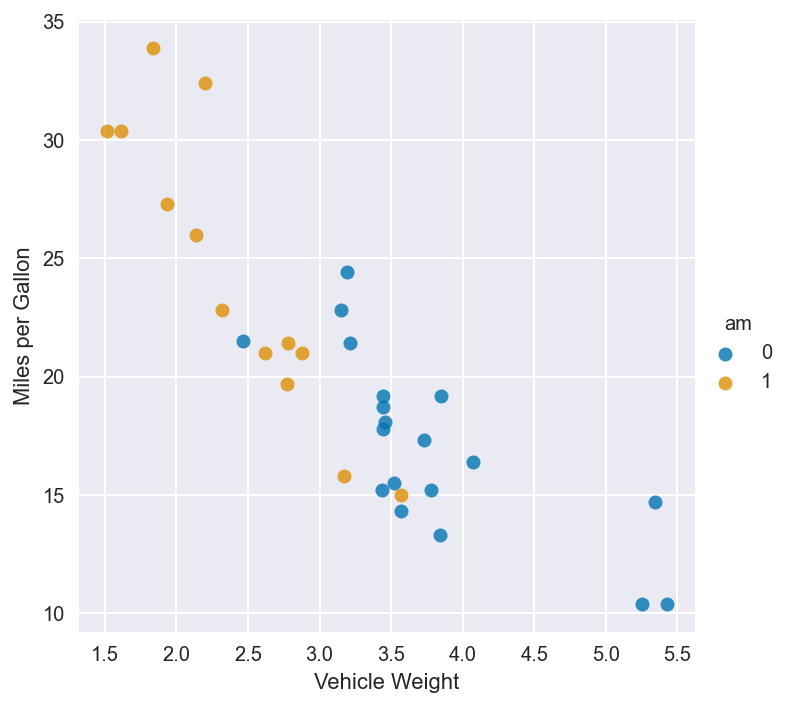

In [7]:
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight");


In [8]:
model_1 = smf.ols(formula="mpg ~ wt + am", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.58e-09
Time:                        23:14:56   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.000      31.074      43.569
wt            -5.3528      0.788     -6.791      0.000      -6.965      -3.741
am            -0.0236      1.546     -0.015      0.988      -3.185       3.138
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.413
Skew:                           0.670   Prob(JB):                        0.299
Kurtosis:                       2.881   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.58e-09
Time:                        23:15:11   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.0

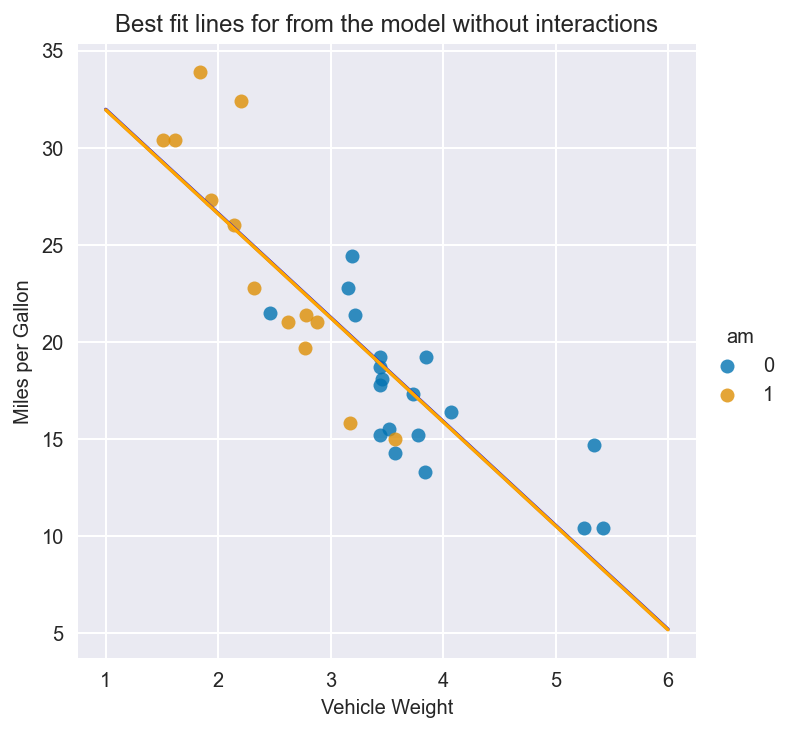

In [8]:
X = np.linspace(1, 6, num=20)
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.title("Best fit lines for from the model without interactions")
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight")
plt.plot(X, 37.3216 - 5.3528 * X, "blue")
plt.plot(X, (37.3216 - 0.0236) - 5.3528 * X, "orange");

In [9]:
model_2 = smf.ols(formula="mpg ~ wt + am + wt:am", data=df).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           5.21e-11
Time:                        22:06:11   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.000      25.230      37.602
wt            -3.7859      0.786     -4.819      0.000      -5.395      -2.177
am            14.8784      4.264      3.489      0.002       6.144      23.613
wt:am         -5.2984      1.445     -3.667      0.001      -8.258      -2.339
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.088
Skew:                           0.761   Prob(JB):                        0.213
Kurtosis:                       2.963   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

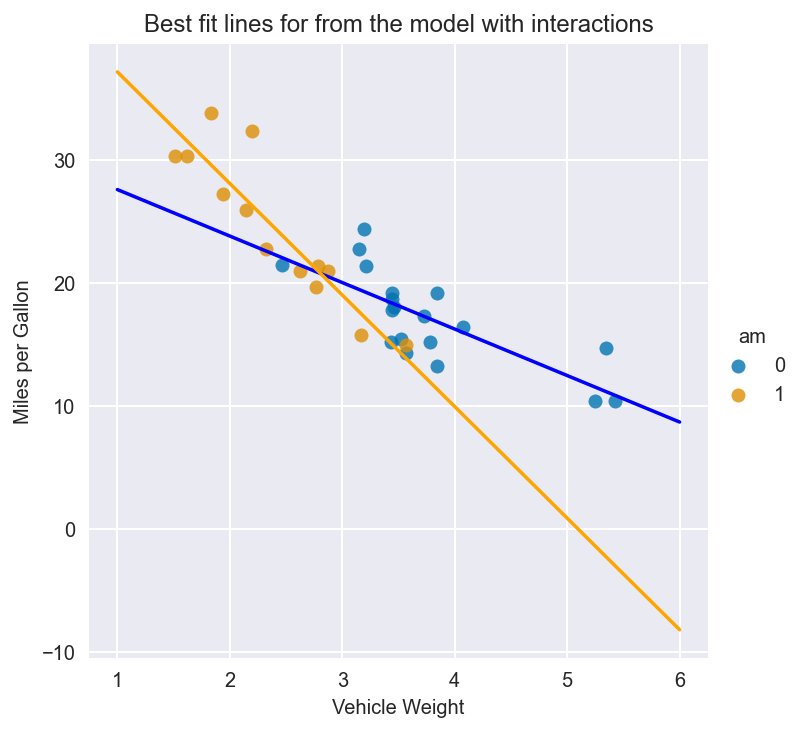

In [10]:
X = np.linspace(1, 6, num=20)
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.title("Best fit lines for from the model with interactions")
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight")
plt.plot(X, 31.4161 - 3.7859 * X, "blue")
plt.plot(X, (31.4161 + 14.8784) + (-3.7859 - 5.2984) * X, "orange");

In [11]:
# bonus 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(df[["wt", "am"]])
pd.DataFrame(X_tr, columns=poly.get_feature_names_out())


,1,wt,am,wt am
0,1.0,2.620,1.0,2.620
1,1.0,2.875,1.0,2.875
2,1.0,2.320,1.0,2.320
3,1.0,3.215,0.0,0.000
4,1.0,3.440,0.0,0.000
5,1.0,3.460,0.0,0.000
6,1.0,3.570,0.0,0.000
7,1.0,3.190,0.0,0.000
8,1.0,3.150,0.0,0.000
9,1.0,3.440,0.0,0.000
